# Modelo de predicción del oro extraído del mineral
En este proyecto se busca preparar un prototipo de modelo de machine learning para la compañía Zyfra. El modelo tendrá como objetivo predecir la cantidad de oro extraído del mineral de oro utilizando datos sobre la extracción y purificación de este metal. Este modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables. 

**Tabla de contenidos**<a id='toc0_'></a>    
- [Preparación de los datos](#toc1_)    
  - [Importación de librerías.](#toc1_1_)    
  - [Lectura de datos](#toc1_2_)    
  - [Información general](#toc1_3_)    
  - [Cálculo de la recuperación](#toc1_4_)    
  - [Características no disponibles en el conjunto de prueba](#toc1_5_)    
  - [Preprocesamiento de los datos](#toc1_6_)    
- [Análisis de los datos](#toc2_)    
  - [Distribución de la concentración de metales en cada etapa](#toc2_1_)    
  - [Distribución del tamaño de partículas entre datasets](#toc2_2_)    
  - [Valores anormales](#toc2_3_)    
- [Desarollo del modelo](#toc3_)    
  - [Funciones para el cálculo de la sMAPE y sMAPE final](#toc3_1_)    
  - [Segmentación de los datos](#toc3_2_)    
  - [Entrenamiento y evaluación de modelos](#toc3_3_)    
  - [Evaluación del mejor modelo en el conjunto de prueba](#toc3_4_)    
- [Conclusiones generales](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Preparación de los datos](#toc0_)

### <a id='toc1_1_'></a>[Importación de librerías.](#toc0_)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


### <a id='toc1_2_'></a>[Lectura de datos](#toc0_)

In [24]:
# Lectura de los datos
try:
    df_train = pd.read_csv('./datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('./datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('./datasets/gold_recovery_full.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')    

### <a id='toc1_3_'></a>[Información general](#toc0_)

In [25]:
print(df_train.info())
print()
print(df_test.info())
print()
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [26]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [27]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [28]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [29]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [30]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [31]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


Se conoce a partir de la información presentada que los datasets presentan un tamaño distinto cada uno, siendo df_full el más grande puesto que contiene todas las columnas y filas de los otros dos datasets.

Se observa también la presencia de valores nulos a lo largo de los tres datasets, los cuales serán tratados en las secciones siguientes. 
Los tres datasets estan compuestos por variables númericas, por lo que no será necesario cambiar el tipo de datos de ellas, excepto por la fecha.

Se observa que df_test tiene un número de columnas menor que los otros dos datasets, lo que se deberá tener en cuenta en el preprocesamiento de los datos.

Por medio de .describe() se observa que los valores de las variables tienen similitudes entre los datasets en cuanto a sus rangos y su distribución, lo cual facilitará el análisis de los datos.


### <a id='toc1_4_'></a>[Cálculo de la recuperación](#toc0_)

Se calcula el valor de la recuperación del oro según la siguiente fórmula:
$$Recuperación = \frac{C\times (F-T)}{F\times (C-T)}\times 100\% $$
donde: 
- *C* — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)
- *F* — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final)
- *T* — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)

In [32]:
# Función para el cálculo de la recuperación
def get_recovery(df, c, f, t):
    recovery = np.where((df[f] * (df[c] - df[t])) != 0, ((df[c] * (df[f] - df[t])) / (df[f] * (df[c] - df[t]))) * 100, 0)
    return recovery

In [33]:
# Llamada a la función para el cálculo de la recuperación
recovery_calculated = get_recovery(df_train.dropna(subset=['rougher.output.recovery']), 
                                    'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
# Remoción de los valores nulos de la columna original
recovery_org = df_train['rougher.output.recovery'].dropna().to_list()

#Calculo del MAE
mae = mean_absolute_error(recovery_org, recovery_calculated)
print('MAE:', mae)

MAE: 9.303415616264301e-15


El MAE resultante es un valor sumamente  bajo, lo que indica que la estimación es bastante precisa.

### <a id='toc1_5_'></a>[Características no disponibles en el conjunto de prueba](#toc0_)

Se verifican las características del conjunto de entrenamiento que no están presentes en el conjunto de prueba:

In [34]:
# Columnas que no están en el conjunto de prueba
columns_list_train = df_train.columns.tolist()
columns_list_test = df_test.columns.tolist()

difference = list(set(columns_list_train) - set(columns_list_test))
for i in difference:
    print(i)
print(len(difference))

final.output.recovery
final.output.tail_sol
rougher.output.concentrate_ag
primary_cleaner.output.concentrate_sol
rougher.calculation.floatbank10_sulfate_to_au_feed
primary_cleaner.output.concentrate_ag
final.output.concentrate_pb
rougher.output.tail_pb
primary_cleaner.output.concentrate_au
final.output.concentrate_ag
secondary_cleaner.output.tail_pb
rougher.calculation.sulfate_to_au_concentrate
secondary_cleaner.output.tail_au
rougher.calculation.au_pb_ratio
primary_cleaner.output.tail_ag
secondary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
rougher.output.concentrate_sol
rougher.output.tail_sol
primary_cleaner.output.tail_sol
rougher.output.tail_au
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.output.recovery
rougher.output.tail_ag
rougher.output.concentrate_au
final.output.concentrate_au
final.output.tail_pb
final.output.tail_au
final.output.tail_ag
primary_cleaner.output.tail_pb
final.output.concentrate_sol
rougher.output.concentrate_pb
secondary_cleaner.outpu

Según se puede observar, las columnas que no estan presentes en el conjunto de prueba corresponden a características de tipo *output* o *calculation* debido a que se midieron o calcularon más tarde. 
A continuación, se incorporan las columnas 'final.output.recovery' y 'rougher.output.recovery' al conjunto de prueba ya que estas son los targets para los modelos a evaluar.

In [35]:
#Se fusiona df_test con sus columnas faltantes provenientes de df_full
df_test = pd.merge(df_test, df_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

#Se remueven de df_train las columnas que no están en df_test
df_train = df_train.drop(columns=[x for x in df_train if x not in df_test], axis=1)

#Se remueven de df_test las columnas que no están en df_train
df_test = df_test.drop(columns=[x for x in df_test if x not in df_train], axis=1)

### <a id='toc1_6_'></a>[Preprocesamiento de los datos](#toc0_)

Se verifica la cantidad de duplicados.

In [36]:
# Revisar duplicados
print('Duplicados en el conjunto de entrenamiento:', df_train.duplicated().sum())
print('Duplicados en el conjunto de prueba:', df_test.duplicated().sum())

Duplicados en el conjunto de entrenamiento: 0
Duplicados en el conjunto de prueba: 0


Se verifica la cantidad de valores nulos en los datasets.

In [37]:
# Total de filas con valores nulos en cualquier columna
print()
print('Total de filas con valores nulos en cualquier columna')
print('Conjunto de entrenamiento:',df_train.isnull().any(axis=1).sum())
print('Conjunto de prueba:', df_test.isnull().any(axis=1).sum())
print('Dataset fuente:',df_full.isnull().any(axis=1).sum())



Total de filas con valores nulos en cualquier columna
Conjunto de entrenamiento: 4181
Conjunto de prueba: 627
Dataset fuente: 6622


In [38]:
print('Dimensiones de los dataframes')
print('Conjunto de entrenamiento:', df_train.shape)
print('Conjunto de prueba:', df_test.shape)
print('Dataset fuente:', df_full.shape)

Dimensiones de los dataframes
Conjunto de entrenamiento: (16860, 55)
Conjunto de prueba: (5856, 55)
Dataset fuente: (22716, 87)


Existen valores ausentes en cada cada columna de los tres conjuntos de datos, excepto para `date`. El origen de los valores ausentes podría ser muy variado y representan una importante proporción para cada dataset (cerca de un 35% para el conjunto de entrenamiento, un 8% para el conjunto de prueba y un 29% para el dataset fuente). Se decide rellenar los valores ausentes con el valor anterior conocido puesto que se conoce que los parámetros cercanos en el tiempo suelen ser similares.

Se imputan los valores ausentes de todas las columnas excepto de `rougher.output.recovery` y `final.output.recovery` puesto que son las variables objetivo y realizar este proceso podría distorsionar los resultados del modelo. Se realiza este proceso únicamente para los conjuntos de entrenamiento y prueba.

In [39]:
fill_col = [x for x in df_train.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
df_train[fill_col] = df_train[fill_col].fillna(method='ffill')

fill_col_test = [x for x in df_test.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
df_test[fill_col_test] = df_test[fill_col_test].fillna(method='ffill')


In [40]:
# Comprobación de valores nulos de las columnas imputadas
print(df_train[fill_col].isnull().sum().sum())
print(df_test[fill_col_test].isnull().sum().sum())

0
0


Debido a que imputar los valores ausentes de las columnas `rougher.output.recovery` y `final.output.recovery` podría afectar los scores del modelo, se decide eliminar las filas que contienen valores ausentes en estas columnas.

In [41]:
# Eliminación de las filas con valores nulos en las columnas objetivo
df_train = df_train.dropna().reset_index(drop=True)
df_test = df_test.dropna().reset_index(drop=True)
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())


0
0


Se cambia el tipo de dato de la columna `date` a `datetime` y se establece como índice de los conjuntos de datos.

In [42]:
# preprocesamiento de los datos
# Cambio de tipo de datos
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
# Establecimiento del índice
df_train = df_train.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')
# Ordenación de los datos
df_train = df_train.sort_index()
df_test = df_test.sort_index()
df_full = df_full.sort_index()
# Eliminación de columnas que no están en el conjunto de prueba

## <a id='toc2_'></a>[Análisis de los datos](#toc0_)

### <a id='toc2_1_'></a>[Distribución de la concentración de metales en cada etapa](#toc0_)

Se grafican histogramas de la concentración de los metales Au, Ag y Pb para cada etapa del proceso de extracción. 

In [43]:
# Cambio de la concentración de metales según la etapa
def plot_stages(df, stage_list):
    for stage in stage_list:
        df[stage].plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label=stage)
        plt.xlim(0, 60)
        plt.ylim(0, 2750)
        plt.legend()
        plt.title(stage)
        plt.xlabel('Concentración de metal')  

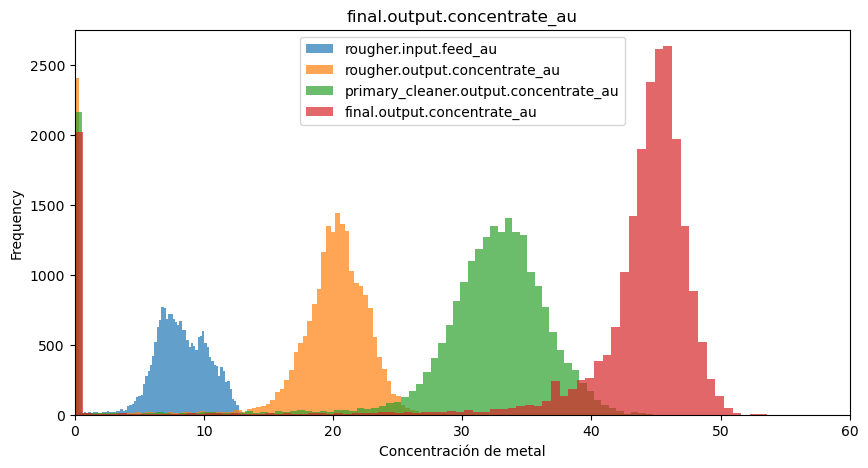

In [44]:
au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
plot_stages(df_full, au)

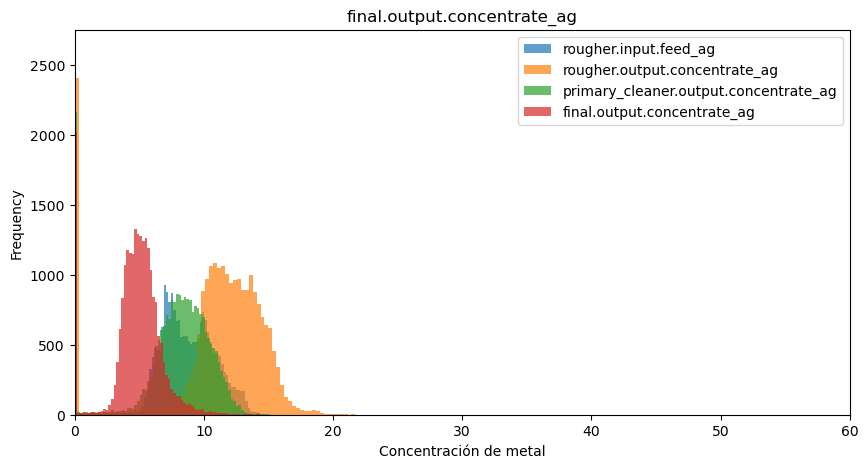

In [45]:
ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
plot_stages(df_full, ag)

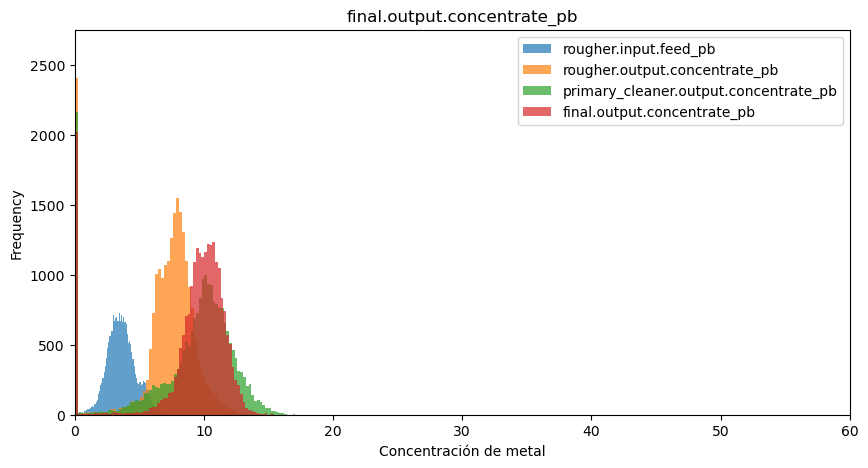

In [46]:
pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
plot_stages(df_full, pb)

Los gráficos muestran que el oro es el metal de mayor presencia en el mineral procesado. 

Se puede observar que la concentración de oro aumenta en cada etapa del proceso de extracción, viéndose una importante diferencia entre la salida de la pimera etapa de limpieza y el concentrado final. Por lo tanto, el proceso de extracción de oro es efectivo.

Para el caso de la plata, la concentración tiende a aumentar luego de la etapa de flotación pero luego disminuye en las etapas de limpieza, lo que podría indicar que la plata se pierde durante estas etapas.

Por último, la concentración de plomo muestra aumentos a lo largo de las tres primeras etapas. Luego de la segunda limpieza, se observa que la concentración mantiene el mismo centro de distribución que la etapa anterior pero con una mayor frecuencia y menor dispersión. Esto podría indicar que la concentración de plomo se estabiliza luego de la segunda limpieza.

### <a id='toc2_2_'></a>[Distribución del tamaño de partículas entre datasets](#toc0_)

A continuación se comparan las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y el conjunto de prueba.

In [47]:
'''
 Función para graficar la distribución de partículas de varios datasets según la etapa
'''
df_train.name = 'train'
df_test.name = 'test'
def plot_feed_size(df_list, stage_size):
    for df in df_list:
        df[stage_size].plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label=df.name)
        plt.legend()
        plt.title(stage_size)
        plt.xlabel('Tamaño de la alimentación')


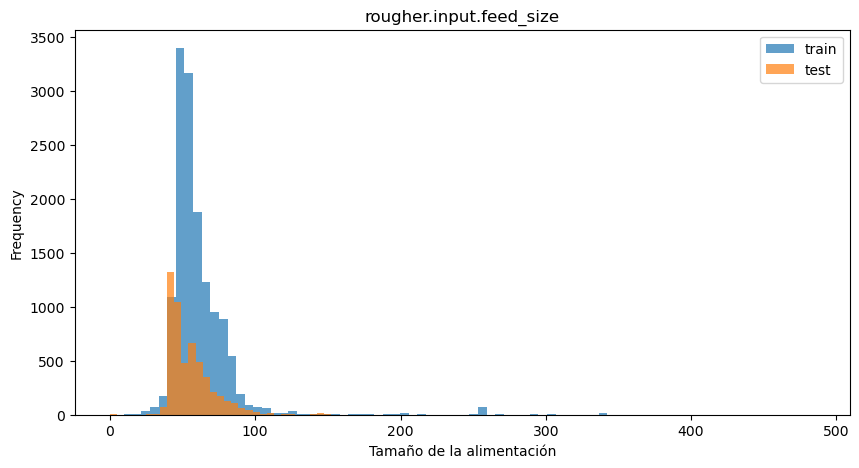

In [48]:
# Llamada a la función para 'rougher.input.feed_size' 
plot_feed_size([df_train, df_test], 'rougher.input.feed_size')


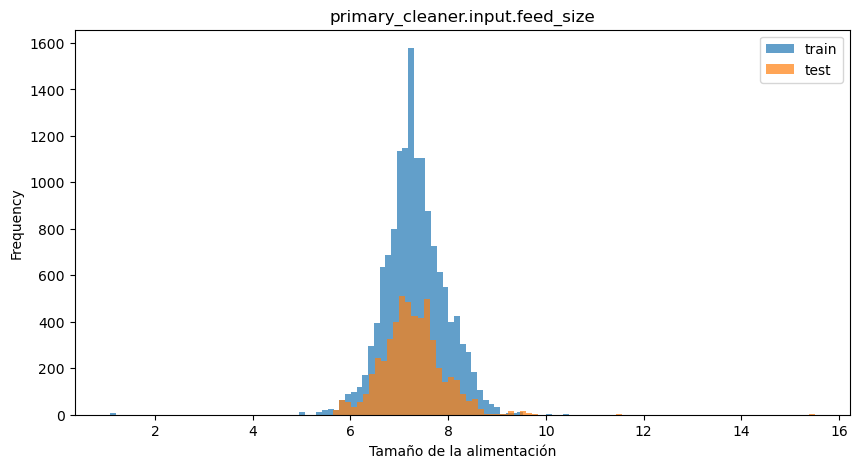

In [49]:
# Llamada a la función para 'primary_cleaner.input.feed_size' 
plot_feed_size([df_train, df_test], 'primary_cleaner.input.feed_size')

A pesar de las diferencias en la frecuencia de los valores, la distribución del tamaño de partículas en ambas etapas es similar en cuanto al rango donde su ubican los valores más frecuentes, el nivel de dispersión de los datos y la forma de la distribución.

### <a id='toc2_3_'></a>[Valores anormales](#toc0_)

Para buscar valores anormales, se suman las concentraciones de los metales en cada etapa y se realizan histograma de cada una.

In [50]:
metal_keys = ('_au', '_ag', '_pb')
# Función para sumar las concentraciones de los metales por etapa
def metal_concen_sum(df, stage):
    total_concen = df[stage+metal_keys[0]] + df[stage+metal_keys[1]] + df[stage+metal_keys[2]]
    return total_concen

Text(0.5, 0, 'Concentración de los tres metales')

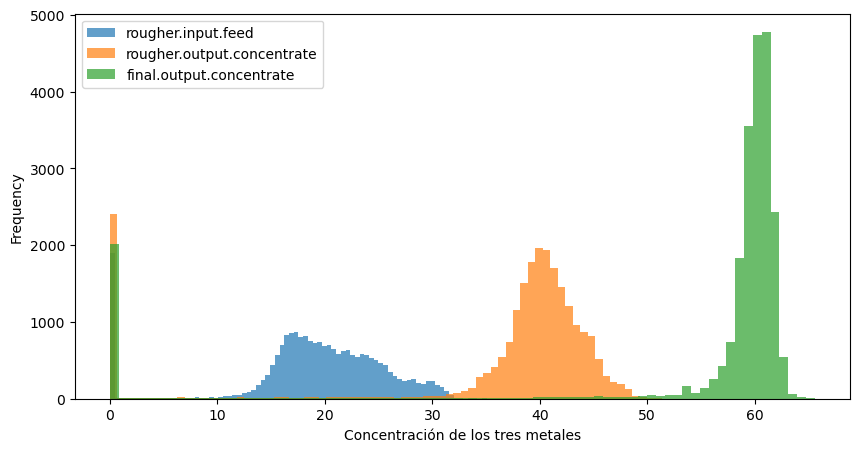

In [51]:
# Gráfico de la suma de concentraciones de los metales por etapa
metal_concen_sum(df_full, 'rougher.input.feed').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='rougher.input.feed')
metal_concen_sum(df_full, 'rougher.output.concentrate').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='rougher.output.concentrate')
metal_concen_sum(df_full, 'final.output.concentrate').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='final.output.concentrate')
plt.legend()
plt.xlabel('Concentración de los tres metales')

El gráfico muestra un aumento en las concentraciones de los metales según avanza el proceso de extracción. Sin embargo, se observa la presencia de un grupo de valores iguales o cercanos a cero en cada etapa, estos valores podrían corresponder con valores anormales. Para que su presencia no afecte el rendimiento del modelo, se decide eliminarlos. Para ello, se elige filtrar los valores mayores a 10.

In [52]:
df_full_clean = df_full.loc[(df_full[['rougher.input.feed_au', 'rougher.input.feed_pb', 
                                               'rougher.input.feed_ag']].sum(axis=1) > 10) 
                                  & (df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 10) 
                                  & (df_full[['final.output.concentrate_au', 'final.output.concentrate_pb', 
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

Se verifica nuevamente la presencia de valores anormales.

Text(0.5, 0, 'Concentración de los tres metales')

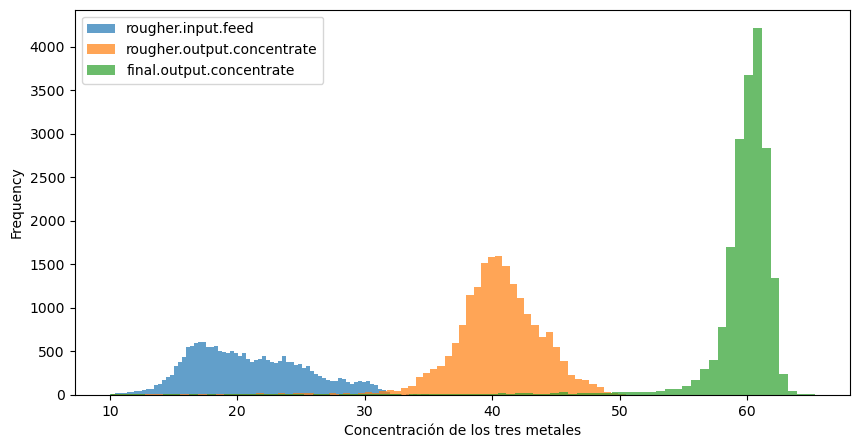

In [53]:
# Gráfico de la concentración total de metales en la etapa rougher
metal_concen_sum(df_full_clean, 'rougher.input.feed').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='rougher.input.feed')
metal_concen_sum(df_full_clean, 'rougher.output.concentrate').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='rougher.output.concentrate')
metal_concen_sum(df_full_clean, 'final.output.concentrate').plot(kind='hist', bins=80, figsize=(10, 5), alpha=0.7, label='final.output.concentrate')
plt.legend()
plt.xlabel('Concentración de los tres metales')

Una vez eliminados los valores anormales de df_full, se filtran las mismas filas en los conjuntos de entrenamiento y prueba.

In [54]:
# Eliminación las filas de df_train y df_test que no están en df_full_clean
df_train_clean = df_train.loc[df_train.index.isin(df_full_clean.index)]
df_test_clean = df_test.loc[df_test.index.isin(df_full_clean.index)]

# Se muestra el largo de los datasets antes y despues de la limpieza
df_length = pd.DataFrame({'Before': [len(df_train), len(df_test)], 'After': [len(df_train_clean), len(df_test_clean)]}, index=['Train', 'Test'])
df_length

,Before,After
Train,14149,13650
Test,5290,5133


## <a id='toc3_'></a>[Desarollo del modelo](#toc0_)

### <a id='toc3_1_'></a>[Funciones para el cálculo de la sMAPE y sMAPE final](#toc0_)

In [55]:
#Función para calcular el sMAPE
def smape(target, predictions):
    smape = np.mean(abs(predictions - target) / ((abs(target) + abs(predictions)) / 2)) * 100 
    return smape

# Función para calcular el sMAPE final
def smape_final(target, predictions):
    predicted_rough, predicted_final = predictions[:, 0], predictions[:, 1]
    true_rough, true_final = target[:, 0], target[:, 1]
    smape_final = (.25 * (smape(true_rough, predicted_rough))) + (.75 * (smape(true_final, predicted_final)))
    return smape_final

### <a id='toc3_2_'></a>[Segmentación de los datos](#toc0_)

Se seleccionan las columnas que van a formar parte de los features y target de cada conjunto de datos. Para features_train se remueven las columnas del conjunto de entrenamiento que no están presentes en el conjunto de prueba junto con las características target, que son 'rougher.output.recovery' y 'final.output.recovery' para evitar la fuga de información. Lo mismo se realiza para features_test luego de incorporar desde df_full las columnas que no estaban disponibles en df_test. 

In [56]:
#Get list of feature and training columns
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in df_train_clean if x not in targets and x != 'date']

#Split training and testing datasets by features and targets.
target_train, target_test = df_train_clean[targets].values, df_test_clean[targets].values
features_train, features_test = df_train_clean[features].values, df_test_clean[features].values

In [57]:
# Se comprueba el tamaño de los conjuntos resultantes
print("Tamaño de los conjuntos generados:")
print("")
print(f"Conjunto de entrenamiento: features {features_train.shape}, target {target_train.shape}.")
print(f"Conjunto de prueba: features {features_test.shape}, target {target_test.shape}.")


Tamaño de los conjuntos generados:

Conjunto de entrenamiento: features (13650, 52), target (13650, 2).
Conjunto de prueba: features (5133, 52), target (5133, 2).


### <a id='toc3_3_'></a>[Entrenamiento y evaluación de modelos](#toc0_)

Se utiliza GridSearchCV para entrenar y evaluar distintos modelos de regresión, así también para encontrar los mejores hiperparámetros de cada modelo. Se utiliza cross-validation para evitar el sobreajuste.
Los modelos se evaluán mediante el cálculo del sMAPE final.

In [58]:
# Puntuador para GridSearchCV
smape_scorer = make_scorer(smape_final, greater_is_better=False)

# Función para entrenar modelos con GridSearchCV
def train_fit_score(model, params, name):
    model = GridSearchCV(model, param_grid=params, cv=5, scoring=smape_scorer, verbose=0, refit=True)
    model.fit(features_train, target_train)
    return pd.DataFrame([[name, abs(model.best_score_), model.best_params_]], columns=['Estimator', 'Best Score', 'Best Params'])

In [59]:
#Decision Tree Regressor
DecisionTree = train_fit_score(DecisionTreeRegressor(random_state=12345), \
                      {'max_depth': range(5, 10, 5), \
                       'min_impurity_decrease' : np.arange(.01, .20, .02) \
                       }, 'Decision Tree')
DecisionTree

,Estimator,Best Score,Best Params
0,Decision Tree,9.210253,"{'max_depth': 5, 'min_impurity_decrease': 0.12..."


In [60]:
#Linear Regressor
LinearRegressor = train_fit_score(LinearRegression(), {}, 'Linear Regressor')
LinearRegressor

,Estimator,Best Score,Best Params
0,Linear Regressor,9.878255,{}


In [61]:
#Lasso Regressor
LassoRegressor = train_fit_score(Lasso(random_state=12345), \
                        {'alpha' : np.arange(.01, 1, .05)}, 'Lasso Regressor')
LassoRegressor

,Estimator,Best Score,Best Params
0,Lasso Regressor,9.192175,{'alpha': 0.36000000000000004}


In [67]:
#Random Forest Regressor
RandomForest = train_fit_score(RandomForestRegressor(random_state=12345), \
                        {'n_estimators' : range(10, 51, 10), \
                         'max_depth': range(1, 11), \
                         'min_impurity_decrease' : np.arange(.01, .20, .05)}, 'Random Forest')

In [79]:
RandomForest

,Estimator,Best Score,Best Params
0,Random Forest,8.853845,"{'max_depth': 4, 'min_impurity_decrease': 0.16..."


Los resultados indican que el modelo de mejor rendimiento es el Random Forest Regresor, que cuenta con un sMAPE final de 8.85.

### <a id='toc3_4_'></a>[Evaluación del mejor modelo en el conjunto de prueba](#toc0_)

In [76]:
# Vista de los mejores parámetros
RandomForest['Best Params'][0]

{'max_depth': 4,
 'min_impurity_decrease': 0.16000000000000003,
 'n_estimators': 50}

In [78]:
# Se ajusta el mejor modelo con los datos de entrenamiento
best_model = RandomForestRegressor(**RandomForest['Best Params'][0]).fit(features_train, target_train)

#Se obtiene el sMAPE final del modelo usando los datos de prueba
Lasso_smape = round(smape_final(target_test, best_model.predict(features_test)), 2)

print(f'sMAPE final para el mejor modelo usando el conjunto de prueba: {Lasso_smape}')

sMAPE final para el mejor modelo usando el conjunto de prueba: 7.18


El sMPA para el conjunto de datos de prueba es mejor que el obtenido para el conjunto de entrenamiento, lo que indica que el modelo no está sobreajustado.

## <a id='toc4_'></a>[Conclusiones generales](#toc0_)

Este proyecto tuvo como objetivo preparar un prototipo de modelo para predecir la cantidad de oro extraído de la materia prima.  Se utilizaron conjuntos de datos que incluyen varios parámetros sobre el proceso de extracción y purificación, los cuales consisten en su totalidad en variables numéricas. 

En primer lugar, se verificaron los valores de la recuperación mediante un cálculo manual, lo cuál demostró que las estimaciones fueron precisas. Después, se identificaron las columnas target de los dataset y se las incorporó al conjunto de prueba donde estaban ausentes. De la misma manera, se removieron columnas de los datasets que no eran necesarias para el entrenamiento de los modelos. 

En el preprocesamiento de los datos, se verificó la cantidad de duplicados, se imputaron los valores ausentes y se transformaron  tipos de datos donde fue necesario. 

El análisis de los datos permitió identificar la distribución de las concentraciones de los metales y sus cambios en cada etapa del proceso de extracción. También se compararon las distribuciones del tamaño de partículas en los conjuntos de entrenamiento y prueba, donde se encontraron distribuciones similares entre las variables. Por último, se identificaron valores anormales en las concentraciones de los metales y se los eliminó.   

Mediante GridSearchCV se entrenaron y evaluaron distintos modelos de regresión, así también se encontraron los mejores hiperparámetros de cada modelo. Los modelos se evaluaron mediante el cálculo del sMAPE final y se utilizó cross-validation para evitar el sobreajuste. Los resultados indican que el modelo de mejor rendimiento es el Random Forest Regresor, que cuenta con un sMAPE final de 8.85 con el conjunto de prueba al configurarse con `max_depth=4`, `min_impurity_decrease=0.16` y `n_estimators=50`.

Se evaluó el mejor modelo en el conjunto de prueba, donde se obtuvo un sMPA mejor que el obtenido para el conjunto de entrenamiento (sMAPE=7.18), lo que indica que el modelo no está sobreajustado. Este resultado también sugiere que este modelo podría ser una buena opción para predecir la extracción del oro. Sin embargo, se recomienda recolectar más datos y reseleccionar las características según las variables más importantes con el objeto de obtener valores de sMAPE más reducidos. 